In [3]:
import linkpred

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [5]:
G = nx.read_graphml('../data/pre2014.graphml')
print(len(G), len(G.edges))

5796 366988


In [6]:
dataset_edges = [e for e in G.edges if  int(G.edges[e]['first']) <20110700]

In [7]:
g = G.edge_subgraph(dataset_edges)

In [8]:
len(g.edges)

4168

In [9]:
train_edges = list()
test_edges = list()

for e in list(g.edges):
    if int(g.edges[e]['first']) <20110500: train_edges.append(e)
    else: test_edges.append(e)
        
        
train = g.edge_subgraph(train_edges)
test = g.edge_subgraph(test_edges)
        

In [10]:
print(len(train),len(test))

934 699


In [26]:
g = train.copy()

### Methods

In [27]:
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges()) # We aim to predict only new links, thus we exclude existing ones
cn_results = cn.predict()

top = cn_results.top(5)
for edge, score in top.items():
    print(edge, score)

5392 - 1796 8.0
5408 - 4056 7.0
4140 - 4085 7.0
4156 - 15189 6.0
10897 - 10647 6.0


##### **Jaccard**
The more similar our friends circles are, the more likely we will become friends.

In [5]:
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
jc_results = jc.predict()

top = jc_results.top(5)
for edge, score in top.items():
    print(edge, score)

RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


##### **Adamic Adar**
The more selective our mutual friends are, the more likely we will become friends.

In [6]:
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
aa_results = aa.predict()

top = aa_results.top(5)
for edge, score in top.items():
    print(edge, score)

TOMMEN - MACE 3.187557281030789
NED - LADY_CRANE 3.1263711657257836
NED - CLARENZO 3.1263711657257836
SANSA - ROBB 3.096644315133246
JOFFREY - CAMELLO 2.8944937119329133


#### 2.B.2 Paths

The second family of predictors is the one that tries to relate node pairs distance with the likelihood of observing a tie among them in the future. </br>
The question such predictors try to answer is: *How distant are we?*


##### **Katz**
Katz computes the weighted sum over all the paths between two nodes.

In [7]:
kz = linkpred.predictors.Katz(g, excluded=g.edges())
kz_results = kz.predict()

top = kz_results.top(5)
for edge, score in top.items():
    print(edge, score)


LADY_CRANE - JAQEN 0.005567281893477002
SANSA - ALLISER_THORNE 0.004169953567762
TYRION - DAARIO 0.004128725185609999
CERSEI - BRIENNE 0.0038690808165880003
MELISANDRE - LYANNA_MORMONT 0.00354647474534


##### **Graph Distance**
Graph Distance computes the (negated) length of the shortest path between two nodes

In [8]:
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
gd_results = gd.predict()

top = gd_results.top(5)
for edge, score in top.items():
    print(edge, score)

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


#### 2.B.3 Rankig

The third family of predictors is the one that tries to relate node pairs position in the graph with the likelihood of observing a tie among them in the future. </br>
The question such predictors try to answer is: *How similar are we?

##### **SimRank**
Two nodes are similar to the extent that their neighborhoods are similar.

In [9]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
simrank_results = simrank.predict(c=0.5)

top = simrank_results.top(5)
for edge, score in top.items():
    print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834243
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.3198896231577875


#### 2.B.4 Miscellanea

In this family fall alternative definitios of link predictors. </br>
``linkpred`` groups here approaches that are commonly used as baselines.

##### **Random**

Random guessing.

In [10]:
rnd = linkpred.predictors.Random(g, excluded=g.edges())
rnd_results = rnd.predict()

top = simrank_results.top(5)
for edge, score in top.items():
    print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834243
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.3198896231577875


<a id='eval'></a>
### 2.C Evaluation and comparison of different predictors

To evaluate a link predictor we have to separate the network used for training from the one used for testing purposes.

In [28]:
import random
import itertools
from linkpred.evaluation import Pair

# Building the test network
test = test

# Exclude test network from learning phase
training = g.copy()

# Node set
nodes = list(g.nodes())
nodes.extend(list(test.nodes()))

# Compute the test set and the universe set
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

After that, we can apply the predictors to the training network

In [29]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

Thus, we can evaluate the obtained prediction against the test

In [30]:

cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)



The results can be easily compared using a ROC plot

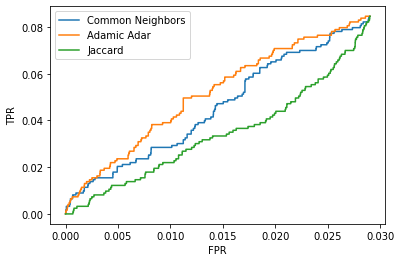

In [31]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()

A simple way to summarize the results offered by the ROC curve is through its AUC

In [32]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.001317830102250289
Adamic Adar: 	 0.001487387714381032
Jaccard: 	 0.0009871704625349035


In [34]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.precision())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.precision())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.precision())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.00019623970346680452
Adamic Adar: 	 0.00022247210785973423
Jaccard: 	 0.00011954584133899441
